<a href="https://colab.research.google.com/github/thiagosarraff/airbnb_dallas/blob/main/airbnb_dallas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

---

# Análise dos Dados do Airbnb - *Dallas - TX*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!  

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.  

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.  

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.  

**Neste *notebook*, iremos analisar os dados referentes à cidade de *Dallas*, no *Texas*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns

# o pacote folium precisa ter a versão mais recente para que possa integrar
# com o mapa criado a partir de dados "geopandas"
folium_ver = !pip show folium
if folium_ver[1] == 'Version: 0.8.3':
  !pip install folium==0.12.1
from folium import Map, Marker

# instalar pacote "geopandas" caso não esteja instalado
try:
  import geopandas as gpd
except ModuleNotFoundError:
  !pip install geopandas
finally:
  import geopandas as gpd

# instalar pacote "mapclassify" caso não esteja instalado
try:
  import mapclassify
except ModuleNotFoundError:
  !pip install mapclassify
finally:
  import mapclassify

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/tx/dallas/2022-05-17/visualisations/listings.csv', parse_dates=['last_review'])

## Análise dos Dados


**Dicionário das variáveis**  

* `id` - identificador único do imóvel
* `name` - nome do imóvel
* `host_id` - identificador único do proprietário
* `host_name` - nome do proprietário
* `neighbourhood_group` - não contém dados válidos (desconsiderar)
* `neighbourhood` - nome do bairro/distrito
* `latitude` - componente latitude das coordenadas geográficas do imóvel
* `longitude` - componente longitude das coordenadas geográficas do imóvel
* `room_type` - tipo de imóvel (quarto, apartamento etc.)
* `price` - preço por dia da locação (em dólares)
* `minimum_nights` - número mínimo de noites necessários para locação
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação registrada
* `reviews_per_month` - média de avaliações por mês
* `calculated_host_listings_cout` - número de imóveis do mesmo proprietário na mesma região
* `availability_365` - disponibilidade nos próximos 365 dias
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `license` - não contém dados válidos (desconsiderar)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44736226,Lakeview Home and Guest House in Historic Rock...,46935434,Taylor,NaN,District 9,32.90794,-96.46437,Entire home/apt,529,2,5,2022-03-17,0.28,1,255,4,NaN
1,573053656875549810,NEW! Updated Rowlett Home: Paradise Park On-Site!,124060715,Evolve,NaN,District 9,32.88239,-96.52959,Entire home/apt,220,2,0,NaT,NaN,24,0,0,NaN
2,40038334,#4 Castle Keep,43897852,Ruth,NaN,District 3,32.66204,-96.92293,Private room,41,1,4,2021-10-30,0.15,9,0,1,NaN
3,50655783,Luxurious Spacious 1 Bedroom in Dallas,349473128,Luxurious,NaN,District 11,32.93762,-96.82281,Entire home/apt,122,1,33,2022-05-08,3.41,1,333,33,NaN
4,54196007,Luxury 1BR GEM Near Galleria Mall All Things Blue,408473679,ALL-EN Luxury Stays & Rentals LLC,NaN,District 11,32.94712,-96.82599,Entire home/apt,136,1,22,2022-05-06,5.32,2,32,22,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Total de registros:', df.shape[0])
print('Total de dimensões:', df.shape[1])

# verificar o tipo das variáveis do DataFrame
print() # adicionando uma linha para separar as informações
df.dtypes

Total de registros: 5428
Total de dimensões: 18



id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isna().sum().sort_values(ascending=False) / df.shape[0]

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.197679
last_review                       0.197679
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Duas variáveis não possuem dados registrados: `license` e `neighbourhood_group`.
Elas serão descartadas para nossa análise.  

Outras duas, `reviews_per_month` e `last_review`, possuem aproximadamente 20% de valores ausentes. Desta forma, utilizaremos uma técnica de preenchimento dos dados para que o nosso conjunto de dados esteja completo.

### **Q3. Qual o tipo de distribuição das variáveis?** 

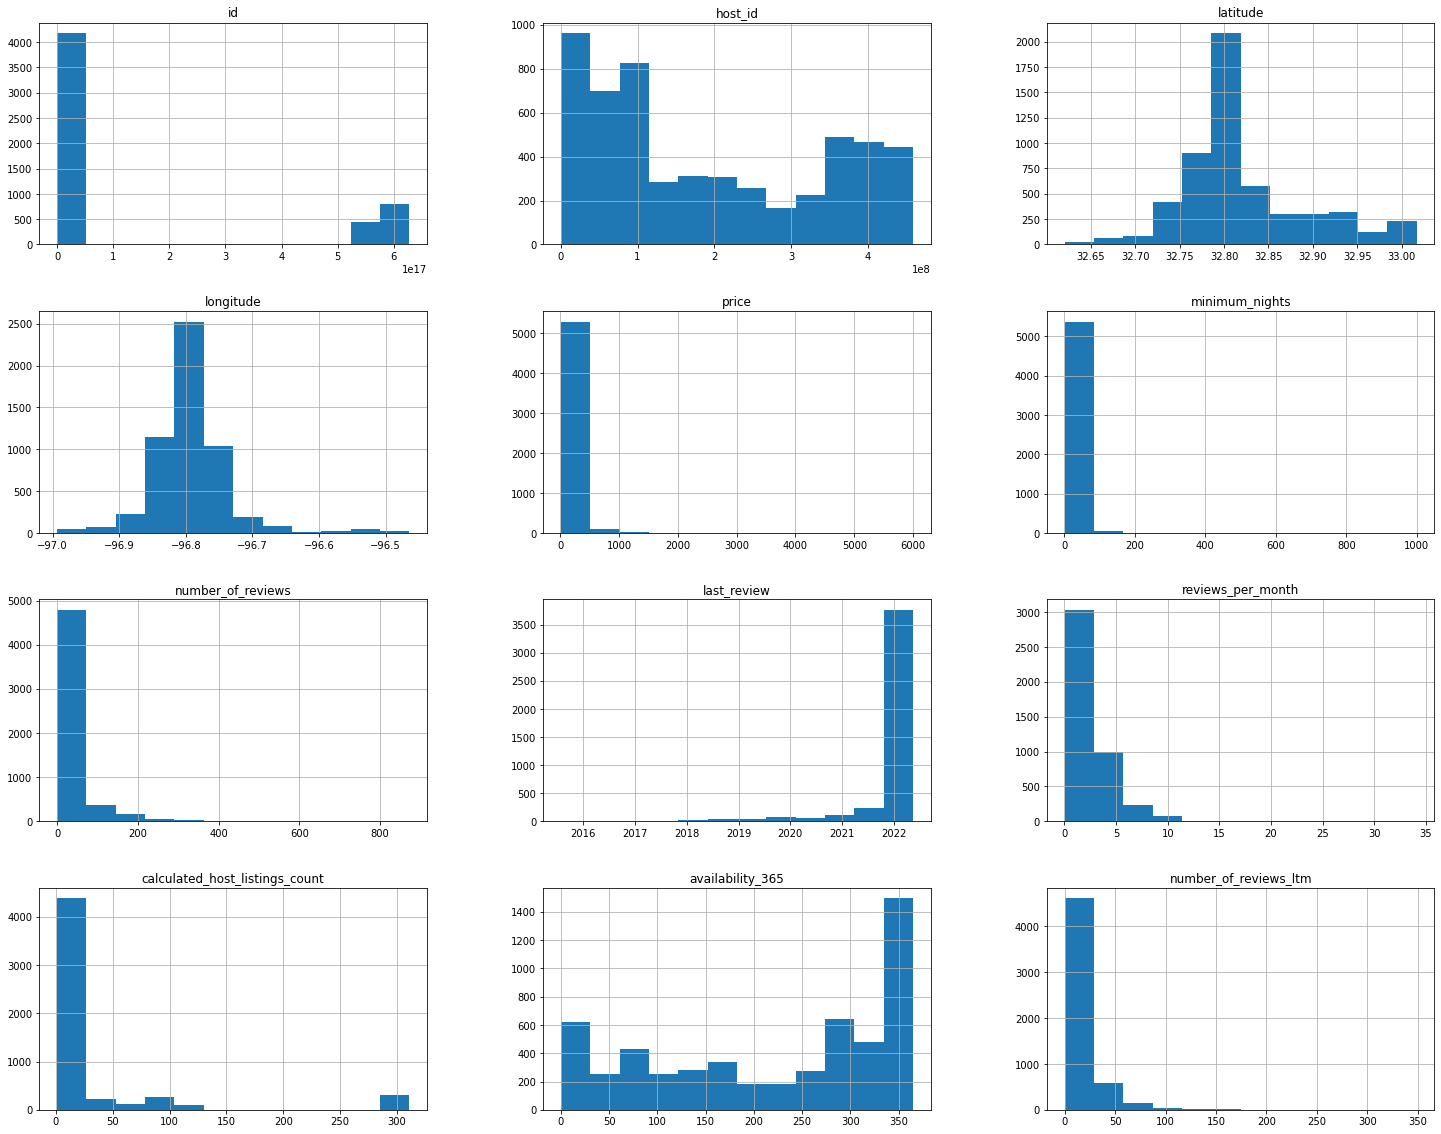

In [6]:
# plotar o histograma das variáveis numéricas
df.drop(columns=['license','neighbourhood_group']).hist(bins=12, figsize=(25,20));

A plotagem do histograma para as variáveis numéricas pode ajudar a identificar alguns comportamentos inesperados. É o caso de `price` e `minimum_nights`. Ambas as variáveis apontadas possuem uma distribuição muito concentrada à esquerda, mas com alguns valores muito à direita, indicando a existência de registros *outliers*.  

Apesar de serem valores possíveis (os da coluna `price`), registros com valores que desviam tanto acabam enviesando a amostragem levam a erros de análise. Como são exceções, eles devem ser tratados e eliminados para que não prejudiquem a tomada de decisão.

In [7]:
# removendo outliers das colunas "price" e "minumum_nights"

# para a variável "price" vamos substituir os valores além de 3 desvios padrões
# pela média da amostra
price_mean, price_std = df.price.mean(), df.price.std()
price_limit = price_mean + (price_std * 3)
df.loc[df.price > price_limit,'price'] = price_mean

# para a variável "minimum_nights" vamos substituir valores além de 31 dias pela
# média da amostra, pois consideramos 1 mês como o máximo valor possível
minimum_nights_mean = df.minimum_nights.mean()
df.loc[df.minimum_nights > 31,'minimum_nights'] = minimum_nights_mean

,price,minimum_nights
count,5428.000000,5428.000000
mean,151.619819,6.204882
std,100.594036,9.153596
min,10.000000,1.000000
25%,90.000000,1.000000
50%,124.000000,2.000000
75%,181.000000,5.000000
max,695.000000,31.000000



Exibindo a distribuição da variável "minimum_nights"
0.1     1.000000
0.2     1.000000
0.3     1.000000
0.4     2.000000
0.5     2.000000
0.6     2.000000
0.7     3.000000
0.8     8.809322
0.9    28.000000
Name: minimum_nights, dtype: float64



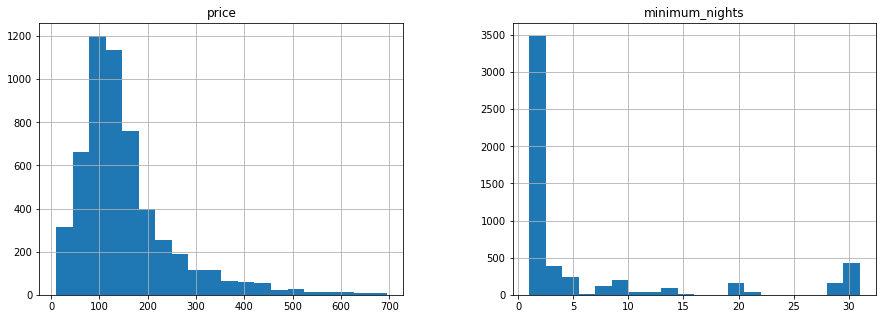

In [8]:
# exibindo nova distribuição das variáveis "price" e "minumum_nights"
display(df[['price','minimum_nights']].describe())
print() # adicionando espaço para impressão

print('Exibindo a distribuição da variável "minimum_nights"')
print(df.minimum_nights.quantile([q/10 for q in range(1,10)]))
print() # adicionando espaço para impressão

df[['price','minimum_nights']].hist(bins=20, figsize=(15,5));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price`  {price:.2f}
print(f'Média do valor das diárias: {df.price.mean():.2f} dólares')

Média do valor das diárias: 151.62 dólares


In [10]:
# ver a média de preços por bairro
df.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
District 6     178.032486
District 13    177.227519
District 14    160.606863
District 9     159.686645
District 4     149.448598
District 11    149.326075
District 2     148.554952
District 3     144.652174
District 1     140.692275
District 5     127.916667
District 10    126.806306
District 7     125.144279
District 12    123.619019
District 8     123.084459
Name: price, dtype: float64

In [11]:
# contar quantos imóveis são oferecidos por em cada bairro. Assim poderemos
# avaliar se a média dos distritos mais baratos/caros estão sendo influenciadas
# por conter apenas poucas unidades disponíveis

df.neighbourhood.value_counts()

District 2     1497
District 14    1487
District 1      427
District 11     382
District 13     269
District 6      250
District 9      247
District 12     244
District 7      201
District 10     165
District 4      107
District 3       92
District 8       36
District 5       24
Name: neighbourhood, dtype: int64

In [12]:
# verificar se há alguma correlação forte entre a média dos preços e a
# quantidade de imóveis listados
df_agg = pd.DataFrame()
df_agg['price_mean'] = df.groupby('neighbourhood').price.mean()
df_agg['value_counts'] = df.groupby('neighbourhood').id.count()
df_agg.corr()

,price_mean,value_counts
price_mean,1.000000,0.288675
value_counts,0.288675,1.000000


A média dos preços das diárias em Dallas ficou em **US$ 151 dólares** no geral. A divisão desta métrica para os bairros (neste conjunto de dados todos os bairros foram nomeados como distritos) evidenciou que o *bairro mais barato possui a média mais baixa em cerca de 30%*.  

Verificamos também que há uma baixa relação (0.3) entre o preço e o número de imóveis listados em cada bairro, e por isso, podemos inferir que **os bairros listados com a média mais baixa são de fato mais baratos para a locação**.  

Ao analisar o número mínimo de noites para estadia, verifica-se que em Dallas a maioria dos proprietários, ou 70%, costuma exigir **até 3 noites como estadia mínima**.

### **Q4. Qual a correlação existente entre as variáveis**

In [13]:
# criar uma matriz de correlação
variaveis_numericas = ['price', 'minimum_nights', 'number_of_reviews',
                       'reviews_per_month', 'calculated_host_listings_count',
                       'availability_365', 'number_of_reviews_ltm']
                       
correlacao = df[variaveis_numericas].corr()

# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.063769,-0.041884,0.016086,-0.015978,0.104993,-0.006978
minimum_nights,-0.063769,1.000000,-0.189511,-0.316097,0.250706,0.092924,-0.266673
number_of_reviews,-0.041884,-0.189511,1.000000,0.520362,-0.144516,-0.050365,0.744010
reviews_per_month,0.016086,-0.316097,0.520362,1.000000,-0.244531,0.055803,0.765855
calculated_host_listings_count,-0.015978,0.250706,-0.144516,-0.244531,1.000000,0.027787,-0.186912
availability_365,0.104993,0.092924,-0.050365,0.055803,0.027787,1.000000,-0.013115
number_of_reviews_ltm,-0.006978,-0.266673,0.744010,0.765855,-0.186912,-0.013115,1.000000


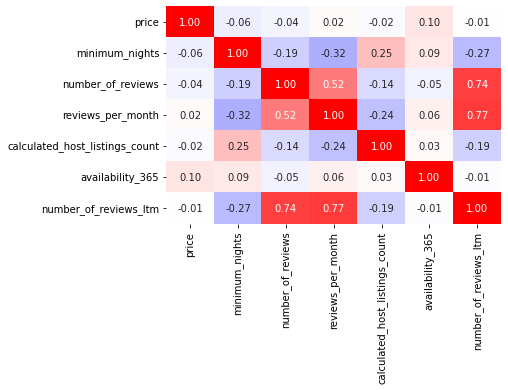

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='bwr', vmin=-1, annot=True, fmt='.2f', cbar=False);

Não é possível fazer **nenhuma inferência analisando a correlacão entre as variáveis** numéricas deste conjunto de dados. Há apenas correlação entre variáveis que são dependentes entre si, como o número de avaliações total, avaliações por mês e avaliações nos últimos 12 meses.  

Há, porém, uma **correlação considerada fraca** entre o *número mínimo de noites para aluguel com o número de avaliações por mês*. Mas a explicação deste resultado é um tanto quanto óbvia, já que um imóvel cuja **estadia mínima é maior terá, necessariamente, menos clientes por mês** num período selecionado.

### **Q5. Qual o tipo de imóvel mais alugado em Dallas?**

In [15]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4635
Private room        672
Shared room         118
Hotel room            3
Name: room_type, dtype: int64

In [16]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    85.390567
Private room       12.380251
Shared room         2.173913
Hotel room          0.055269
Name: room_type, dtype: float64

In [17]:
# listar imóveis do tipo "Hotel room" para verificar se são do mesmo dono e
df[df.room_type == 'Hotel room'][['id','name','host_id','latitude','longitude']]

,id,name,host_id,latitude,longitude
1245,37799363,"Deep Ellum Hostel, 6-Bed Coed Shared Dorm",201420392,32.78415,-96.78275
1269,38177738,"Deep Ellum Hostel, 8-Bed Coed Shared Dorm",201420392,32.78602,-96.78252
1271,38177818,"Deep Ellum Hostel, 4-Person Private Ensuite",201420392,32.78397,-96.78267


A maior parte dos imóveis disponíveis para locação em Dallas corresponde a **apartamentos inteiros**, chegando a 85% do total.  

Segundo a própria Airbnb, este tipo de locação (de todo o espaço/apartamento) geralmente inclui cozinha. Isso torna a experiência ótima para hóspedes que gostam de fazer suas próprias refeições.  

Pouco comum na região analisada é o aluguel de quartos compartilhados, com apenas 2% do total. O número de quartos de hotéis é de apenas 3, sendo todos do mesmo dono e localizados no mesmo *hostel*. Apesar de terem sido assim categorizados, pelo nome da hospedagem é possível perceber que 2 deles são também quartos compartilhados.

### **Q6. Qual a localidade mais cara de Dallas?**



In [18]:
# lendo arquivo com a coordenada dos bairros (distritos) fornecido pela
# prefeitura de Dallas (https://gis.dallascityhall.com/shapefileDownload.aspx)
mapa = gpd.read_file("https://gis.dallascityhall.com/resources/zip/Councils.zip")

# adicionando uma coluna no dataset principal com o número do distrito
df['district'] = df.neighbourhood.map(lambda x: x.replace('District ',''))

# juntando o número de apartamentos disponíveis por distrito para plotar o mapa
mapa = mapa.join(df.groupby('district').id.count(), how='left', on='DISTRICT')
mapa = mapa.join(df.groupby('district').price.mean(), how='left', on='DISTRICT')
mapa.price = mapa.price.apply(lambda x: round(x,2))
mapa.rename(columns={'DISTRICT':'Distrito', 'id':'Contagem de imóveis',
                     'price':'Preço médio'}, inplace=True)
# verificando o conjunto de dados para plotagem do mapa
display(mapa)

,COUNCIL,Distrito,COUNCILPER,COMMENTS,SHAPE_STAr,SHAPE_STLe,geometry,Contagem de imóveis,Preço médio
0,1,1,Chad West,Inaugurated 2019-06-17,3.433526e+08,88541.304254,"POLYGON ((2487924.453 6967755.111, 2488005.038...",427,140.69
1,2,2,Jesse Moreno,Inaugurated 2021-06-14,5.140035e+08,234255.365431,"POLYGON ((2472977.987 7004186.876, 2473123.361...",1497,148.55
2,3,3,"Casey Thomas, II",Inaugurated 2019-06-17,1.407445e+09,363612.475125,"POLYGON ((2436007.482 6943123.284, 2436474.409...",92,144.65
3,4,4,Carolyn King Arnold,Inaugurated 2019-06-17,5.735295e+08,119105.550747,"POLYGON ((2495172.863 6960538.746, 2495281.495...",107,149.45
4,5,5,Jaime Resendez,Inaugurated 2019-06-17,5.117963e+08,122534.440932,"POLYGON ((2519631.808 6970829.635, 2519827.130...",24,127.92
5,6,6,Omar Narvaez,Inaugurated 2019-06-17,1.132490e+09,454020.329271,"POLYGON ((2438552.871 7031070.157, 2438566.218...",250,178.03
6,7,7,Adam Bazaldua,Inaugurated 2019-06-17,7.380978e+08,209464.644948,"POLYGON ((2533183.553 6986708.703, 2533183.903...",201,125.14
7,8,8,Tennell Atkins,Inaugurated 2019-06-17,1.537159e+09,339128.709226,"POLYGON ((2487319.251 6922760.999, 2487330.999...",36,123.08
8,10,10,Adam McGough,Inaugurated 2019-06-17,4.448477e+08,107942.185673,"POLYGON ((2526187.716 7007546.586, 2526087.781...",165,126.81
9,11,11,Jaynie Schultz,Inaugurated 2021-06-14,4.610880e+08,142316.713289,"POLYGON ((2488656.667 7046171.794, 2488612.650...",382,149.33


In [19]:
# explorando o mapa de Dallas com a divisão por distritos considerando
# o preço médio e a quantidade de imóveis disponíveis
mapa.explore('Preço médio', cmap='Blues', width=600, height=600, vmin=100,
             tooltip=['Distrito','Contagem de imóveis','Preço médio'])

Analisando o mapa acima, podemos identificar uma tendência de diminuição dos preços à medida em que nos afastamos do centro geométrico da cidade. Há também uma tendência geral de **preços mais caros para os imóveis localizados na região noroeste, e mais baratos para aqueles localizados na região sudeste** da cidade. Além disso, os distritos 8 e 5, na região sudeste, possuem o menor número de imóveis listados, sugerindo que a localidade é realmente menos procurada, e por isso seus preços são menores.

Ao visualizar o mapa também é possível visualizar um clarão onde não há distrito especificado. Ele coincide com as regiões chamadas University Park e Highland Park. A princípio isso poderia sugerir um erro ou no conjunto de dados fornecido pela Airbnb ou no dataset de coordenadas dos bairros/distritos disponibilizado pela prefeitura. No entanto, ao fazer uma busca por imóveis para locação nesta região, vemos que realmente não opções disponíveis.

![Airbnb Dallas](https://i.ibb.co/9qdZ9tB/Airbnb-Dallas.png)

---
## Conclusões


Esta foi uma **análise exploratória** no conjunto de dados resumidos da empresa **Airbnb** para a cidade de *Dallas, no Texas* (EUA).  

O conjunto escolhido possui um total de **5428** registros de imóveis disponíveis para locação em Dallas, distribuídos em 14 bairros (ou distritos).  

Após alguns ajustes nas variáveis disponíveis no dataset, verificamos então a distribuição de imóveis por distrito e o valor médio para aluguel em cada localidade. **Nos distritos 8 e 5 há um número relativamente menor de unidades à disposição para locação e o preço médio também se mostrou menor. Já os distritos 6 e 3, na região noroeste, se mostraram os mais caros para uma locação temporária pelo aplicativo.**  

No conjunto de dados analisado verificamos que 60% dos imóveis listados possuem tempo mínimo de permanência de até 2 diárias. Após essa breve análise, concluímos que uma rápida visita à terceira cidade mais populosa do Texas, Dallas, custará, em média, o seguinte: 151,62 dólares x 2 diárias = 303,24 dólares. Considerando a cotação atual do dólar (5,15 em 19/06/2022), **o valor total da hospedagem seria de 1561,69 reais** (desconsiderando eventuais taxas e impostos).